In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\Machine_Learning_Projects\Student_performance\notebooks\data\student.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
categorical_columns = [col for col in data.columns if data[col].dtype == "O"]
for col in categorical_columns:
    print(f"The unique values in {col} are {data[col].unique()}")

The unique values in gender are ['female' 'male']
The unique values in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values in lunch are ['standard' 'free/reduced']
The unique values in test preparation course are ['none' 'completed']


In [16]:
numerical_columns = [col for col in data.columns if data[col].dtype != "O"]
numerical_columns

['math score', 'reading score', 'writing score']

In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
data["Total_Score"] = data['math score'] + data['reading score'] + data['writing score']
data['Average_Score'] = data['Total_Score']/3

In [20]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
full_marks_reading = data[data['reading score'] == 100]['Average_Score'].count()
full_marks_writing = data[data['writing score'] == 100]['Average_Score'].count()
full_marks_maths = data[data['math score'] == 100]['Average_Score'].count()

print(f"The number of students in reading with full marks are {full_marks_reading}")
print(f"The number of students in writing with full marks are {full_marks_writing}")
print(f"The number of students in maths with full marks are {full_marks_maths}")

The number of students in reading with full marks are 17
The number of students in writing with full marks are 14
The number of students in maths with full marks are 7


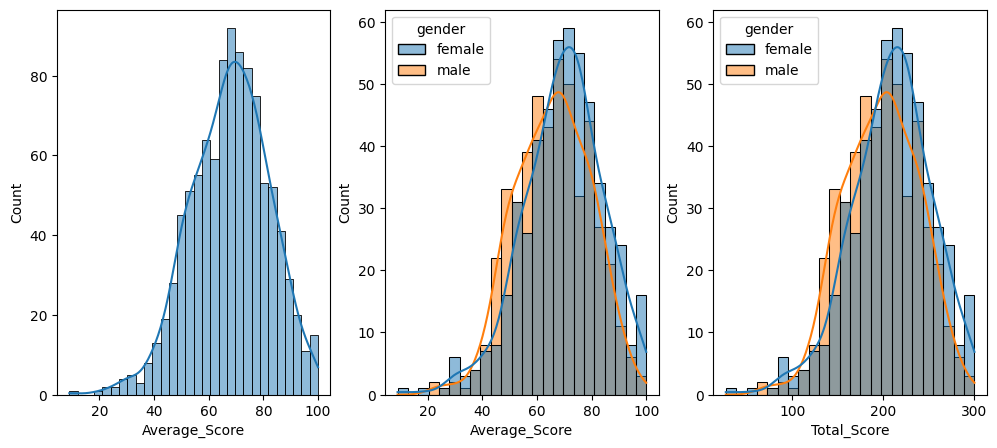

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.histplot(data=data, x=data['Average_Score'], bins=30, kde=True)
plt.subplot(1,3,2)
sns.histplot(data=data, x = data['Average_Score'], hue=data['gender'], kde=True)
plt.subplot(1,3,3)
sns.histplot(data=data, x = data['Total_Score'], hue=data['gender'], kde=True)
plt.show()